In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-accummulation-M17


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

# local import 
import scripts.WeatherArchive as weta

In [3]:
colors = sns.palettes.color_palette('colorblind')

In [4]:
vogel = pd.read_csv("data/weather/vogel_archive_2018_2020.csv",header = 6)

vogel.index =  pd.to_datetime(vogel["Local time in Vogel"],dayfirst=True)
vogel.sort_index(inplace = True)

vogel.replace("No precipitation",0., inplace = True)
vogel.replace("Trace of precipitation",0.1, inplace = True)


In [5]:
M17_75 = pd.read_csv("data/weather/logger_75_2018_2020.csv",header = 2)
M17_75['datetime'] = pd.to_datetime(M17_75['Date Time - GMT +01:00'].copy(),dayfirst=True)
M17_75.index = M17_75['datetime']
M17_75.columns = ['Serial','datetime_gmt','T','RH','Dewpoint','connect','button','eof','datetime']
M17_75 =M17_75.resample('H').mean().copy()

In [6]:
M17_73 = pd.read_csv("data/weather/logger_73_2018_2019.csv",header = 2)
M17_73['datetime'] = pd.to_datetime(M17_73['Date Time - GMT +01:00'].copy(),dayfirst=True)

M17_73.index = M17_73['datetime']
M17_73.columns = ['datetime_gmt','T','RH','Dewpoint','power','button','connect','eof','datetime']
M17_73 =M17_73.resample('H').mean().copy()

M17_73.head()



,T,RH,Dewpoint
datetime,,,
2018-08-08 09:00:00,6.78,71.30,1.95
2018-08-08 10:00:00,2.19,92.55,1.10
2018-08-08 11:00:00,2.14,93.72,1.24
2018-08-08 12:00:00,2.06,94.45,1.26
2018-08-08 13:00:00,2.10,94.88,1.36


In [8]:
open_closed = {"2018-08-11":["closed","2018-01-01","2018-09-03",9,'left'],
               "2018-10-22":["open","2018-09-01","2018-12-15",20,'center'],
               "2019-06-19":["closed","2018-12-16","2019-11-01",60,'center'],
               "2020-06-30":["open","2019-11-01","2020-11-01",110,'right']}

In [15]:
t_out = vogel['T'].resample("H").mean()
t_in = M17_75['T']
rh_in = M17_75['RH']
pp_out = vogel['RRR']

# set up start and end points of the plot
s = pd.to_datetime('2018-08-11')
e = pd.to_datetime('2020-07-04')

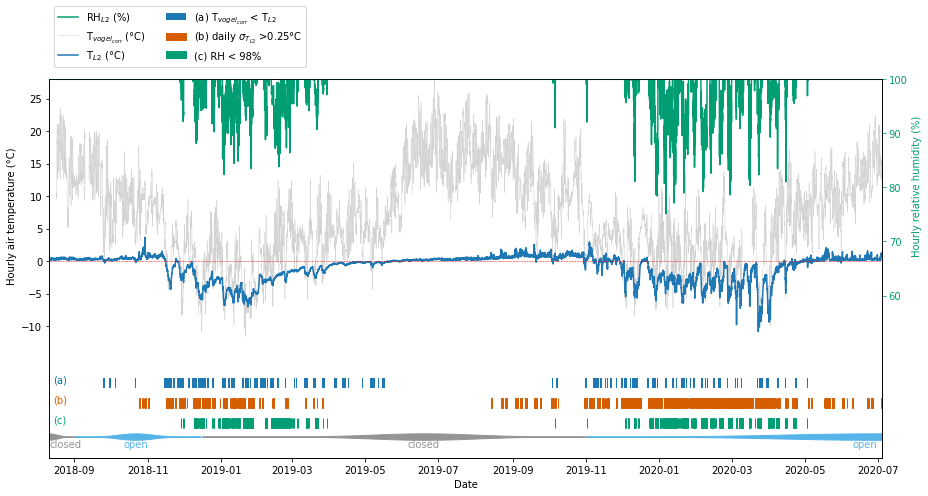

In [16]:
weta.CavePlot(t_in,t_out,rh_in,s,e,offset=-1.93,path ="../reports/M17_manuscript/figures/f06.pdf",o_c = open_closed, **{"dpi":400})

## Supplementary figure 5

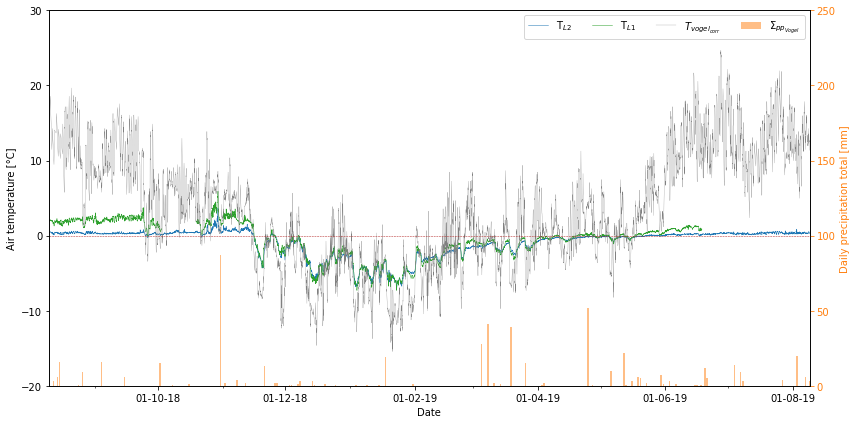

In [11]:
fig, ax = plt.subplots(figsize = (12,6))

s = pd.to_datetime("10-08-2018",dayfirst=True)
e = pd.to_datetime("09-08-2019", dayfirst= True)

months = mdates.MonthLocator(interval=2)
months_fmt = mdates.DateFormatter('%d-%m-%y')
months2 = mdates.MonthLocator()

ax.plot(M17_75['T'][s:e], label= 'T$_{L2}$', lw = 0.5)
ax.plot(M17_73['T'][s:e], label= 'T$_{L1}$', color = 'C2', lw = 0.5)
ax.plot(vogel['T'][s:e].index,vogel['T'][s:e].to_numpy()-1.93, label = '$T_{vogel_{corr}}$', lw= 0.25,color = 'gray')

ax.set_xlabel('Date')
ax.set_ylabel('Air temperature [°C]')
ax.axhline(y = 0, lw = 0.5, ls = '--', color = 'firebrick')
ax.set_xlim(s,e)

axpp = ax.twinx()

vog_pp = pd.to_numeric(vogel['RRR']).resample('D').max()
for a in (ax,axpp):
    
    a.xaxis.set_major_locator(months)
    a.xaxis.set_minor_locator(months2)
    a.xaxis.set_major_formatter(months_fmt)
    
axpp.bar(vog_pp.index,height=vog_pp, zorder = -100, color = 'C1', alpha = 0.5, label = '$\Sigma_{pp_{Vogel}}$')

axpp.yaxis.label.set_color("C1")
axpp.tick_params(axis='y', colors="C1")
hl1 = ax.get_legend_handles_labels()
hl2 = axpp.get_legend_handles_labels()
h = [h for h in (hl1[0] + hl2[0])]
l = [l for l in (hl1[1] + hl2[1])]


ax.legend(h,l,bbox_to_anchor=(0., 0.9, 1., .102), ncol = 4)
axpp.set_ylabel('Daily precipitation total [mm]')
axpp.set_ylim(0,250)
ax.set_ylim(-20,30)




plt.tight_layout()
plt.savefig('../reports/M17_manuscript/figures/sf05.pdf')
plt.show()
plt.close(fig)

## Supplementary figure 6

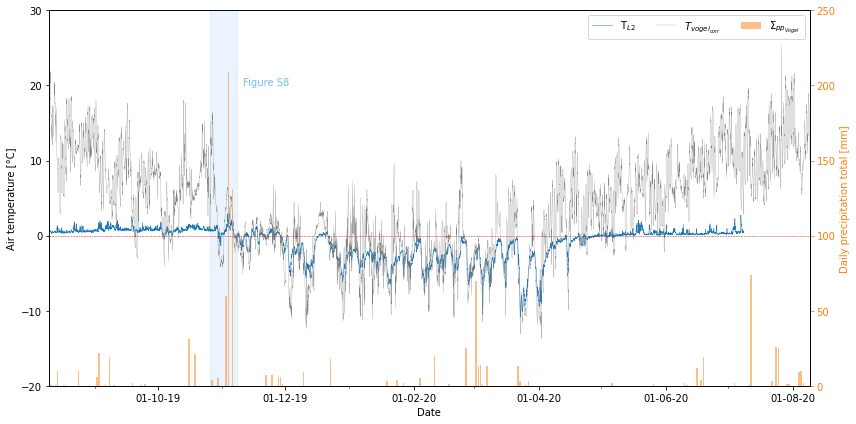

In [12]:
fig, ax = plt.subplots(figsize = (12,6))

s = pd.to_datetime("10-08-2019",dayfirst=True)
e = pd.to_datetime("09-08-2020", dayfirst= True)

months = mdates.MonthLocator(interval=2)
months_fmt = mdates.DateFormatter('%d-%m-%y')
months2 = mdates.MonthLocator()

ax.plot(M17_75['T'][s:e], label= 'T$_{L2}$', lw = 0.5)
ax.plot(vogel['T'][s:e].index,vogel['T'][s:e].to_numpy()-1.93, label = '$T_{vogel_{corr}}$', lw= 0.25,color = 'gray')

ax.set_xlabel('Date')
ax.set_ylabel('Air temperature [°C]')
ax.axhline(y = 0, lw = 0.5, ls = '--', color = 'firebrick')
ax.set_xlim(s,e)

axpp = ax.twinx()

vog_pp = pd.to_numeric(vogel['RRR']).resample('D').max()
for a in (ax,axpp):
    
    a.xaxis.set_major_locator(months)
    a.xaxis.set_minor_locator(months2)
    a.xaxis.set_major_formatter(months_fmt)
    
axpp.bar(vog_pp.index,height=vog_pp, zorder = -50, color = 'C1', alpha = 0.5, label = '$\Sigma_{pp_{Vogel}}$')

axpp.yaxis.label.set_color("C1")
axpp.tick_params(axis='y', colors="C1")

hl1 = ax.get_legend_handles_labels()
hl2 = axpp.get_legend_handles_labels()
h = [h for h in (hl1[0] + hl2[0])]
l = [l for l in (hl1[1] + hl2[1])]


ax.legend(h,l,bbox_to_anchor=(0., 0.9, 1., .102), ncol = 4)
axpp.set_ylabel('Daily precipitation total [mm]')
axpp.set_ylim(0,250)

ax.fill_betweenx(x1=pd.to_datetime('26-10-2019',dayfirst=True),x2 =pd.to_datetime('08-11-2019',dayfirst=True),y = np.arange(-20,32),color = 'xkcd:sky blue',alpha = 0.15, zorder = -100)
ax.set_ylim(-20,30)

ax.text(pd.to_datetime('11-11-2019',dayfirst=True),20,'Figure S8',color = 'xkcd:sky blue')
plt.tight_layout()
plt.savefig('../reports/M17_manuscript/figures/sf06.pdf')
plt.show()
plt.close(fig)

## Supplementary figure 7

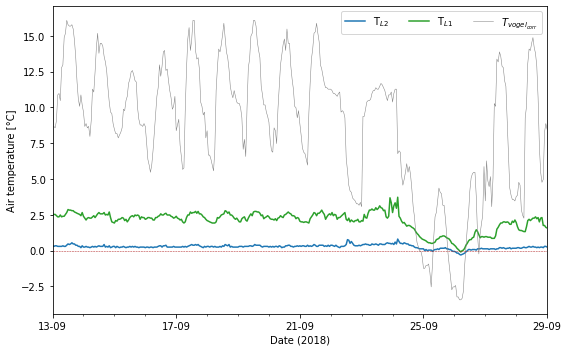

In [13]:
fig, ax = plt.subplots(figsize = (8,5))

s = pd.to_datetime("13-09-2018")
e = pd.to_datetime("29-09-2018")

days = mdates.DayLocator(interval=4)
days2 = mdates.DayLocator(interval=1)
days_fmt = mdates.DateFormatter('%d-%m')


ax.plot(M17_75['T'][s:e], label= 'T$_{L2}$')
ax.plot(M17_73['T'][s:e], label= 'T$_{L1}$',color = 'C2' )
ax.plot(vogel['T'][s:e].index,vogel['T'][s:e].to_numpy()-1.93, label = '$T_{vogel_{corr}}$', lw= 0.5,color = 'gray')
ax.xaxis.set_major_locator(days)
ax.xaxis.set_minor_locator(days2)


ax.xaxis.set_major_formatter(days_fmt)
ax.set_xlabel('Date (2018)')
ax.set_ylabel('Air temperature [°C]')
ax.axhline(y = 0, lw = 0.5, ls = '--', color = 'firebrick')
ax.set_xlim(s,e)
# gather up the legend handles and labels from axT and axRH
h,l = [hl for hl in ax.get_legend_handles_labels()]
  
# make it so it appears on the top left corner, out of the plotting area
ax.legend(h,l,bbox_to_anchor=(0., 0.9, 1., .102), ncol = 3)

plt.tight_layout()
plt.savefig('../reports/M17_manuscript/figures/sf07.pdf')
plt.show()
plt.close(fig)

## Supplementary figure 8

Here, we plot precipitation, in-cave temperature and corrected vogel temperature.

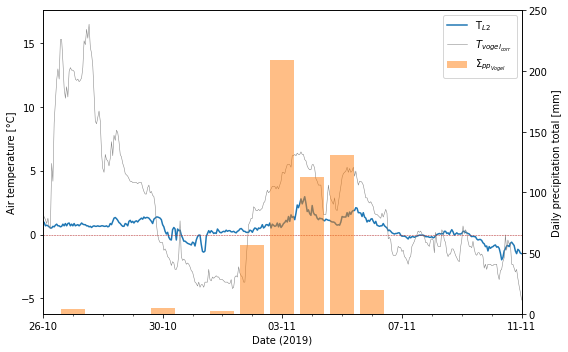

In [14]:
# precipitation record
dates = [pd.to_datetime('2019-10-{}'.format(i)) for i in range(27,32)]+[ pd.to_datetime('2019-11-0{}'.format(i)) for i in range(1,8)]
precip = [4,0,0,5,0,2,57,209,113,131,20,0]
df = pd.DataFrame({'pp':precip}, index = dates)

fig, ax = plt.subplots(figsize = (8,5))

s = pd.to_datetime("26-10-2019")
e = pd.to_datetime("11-11-2019")

days = mdates.DayLocator(interval=4)
days2 = mdates.DayLocator(interval=1)

days_fmt = mdates.DateFormatter('%d-%m')

ax.plot(M17_75['T'][s:e], label= 'T$_{L2}$')
ax.plot(vogel['T'][s:e].index,vogel['T'][s:e].to_numpy()-1.93, label = '$T_{vogel_{corr}}$', lw= 0.5,color = 'gray')

axpp = ax.twinx()
for a in (ax,axpp):
    
    a.xaxis.set_major_locator(days)
    a.xaxis.set_minor_locator(days2)
    a.xaxis.set_major_formatter(days_fmt)
    
ax.set_xlabel('Date (2019)')
ax.set_ylabel('Air temperature [°C]')
ax.axhline(y = 0, lw = 0.5, ls = '--', color = 'firebrick')
ax.set_xlim(s,e)
# gather up the legend handles and labels from axT and axRH
  
# make it so it appears on the top left corner, out of the plotting area


axpp.bar(df['pp'].index,height=df['pp'], zorder = -100, color = 'C1', alpha = 0.5, label = '$\Sigma_{pp_{Vogel}}$')

hl1 = ax.get_legend_handles_labels()
hl2 = axpp.get_legend_handles_labels()
h = [h for h in (hl1[0] + hl2[0])]
l = [l for l in (hl1[1] + hl2[1])]


ax.legend(h,l,bbox_to_anchor=(0., 0.9, 1., .102), ncol = 1)
axpp.set_ylabel('Daily precipitation total [mm]')
axpp.set_ylim(0,250)



plt.tight_layout()
plt.savefig('../reports/M17_manuscript/figures/sf08.pdf')
plt.show()
plt.close(fig)